In [ ]:
!wget -O intents.json https://www.dropbox.com/s/3jiidcrzwi40nbi/bot-fix.json?dl=0

--2022-12-14 04:31:35--  https://www.dropbox.com/s/3jiidcrzwi40nbi/bot-fix.json?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3jiidcrzwi40nbi/bot-fix.json [following]
--2022-12-14 04:31:35--  https://www.dropbox.com/s/raw/3jiidcrzwi40nbi/bot-fix.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3f716357e845e623dec993bc84.dl.dropboxusercontent.com/cd/0/inline/BynjhjxzeEx_f35gB3Vrh_iMJyBCAqX-Nv96muHlA6YgTJYZi5e3hFZeO30SHkUmeGvC3hvVHU6zpq-STu1RfxbwKbTacfm9ZONPvKX5THr990fb-V_ucN0c94Kp_SP6o8069i5TMojJtseIHsJlltEoc-iJajAL80cag6FoVw0xiQ/file# [following]
--2022-12-14 04:31:36--  https://uc3f716357e845e623dec993bc84.dl.dropboxusercontent.com/cd/0/inline/BynjhjxzeEx_f35gB3Vrh_iMJyBCAqX-Nv96muHlA6YgTJYZi5e3hFZeO30SHkUmeGvC3hvVHU6

In [ ]:
import json
import pandas as pd
import nltk
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

%matplotlib inline

In [ ]:
# install wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = [] # data respon
words=[] # Data kata
classes=[] # Data Kelas atau Tag
documents=[] # Data Kalimat Dokumen
ignore=['?','!',',',"'s"] # Mengabaikan tanda spesial karakter

# mengimport dataset yang sudah didownload
data_file=open('/content/intents.json').read()
intents=json.loads(data_file)

In [ ]:
intents

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    responses.append(lines)
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

TypeError: ignored

In [ ]:
# Melakukan konversi data yang sudah diambil ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags, "responses":responses,})

ValueError: ignored

In [ ]:
data.columns

Index(['patterns', 'tags', 'responses'], dtype='object')

In [ ]:
data

,patterns,tags,responses
0,hallo,greeting,hallo
1,hai,greeting,hai
2,halo,greeting,halo
3,hei,greeting,hei
4,hi,greeting,hi
...,...,...,...
1003,beri saya pantun,pantun,beri saya pantun
1004,bisakah kamu membuat pantun,pantun,bisakah kamu membuat pantun
1005,pantun dong,pantun,pantun dong
1006,kasih pantun dong,pantun,kasih pantun dong


In [ ]:
data.columns

Index(['patterns', 'tags', 'responses'], dtype='object')

In [ ]:
df = data.tags

In [ ]:
df1 = data.patterns

In [ ]:
df1

0                             hallo
1                               hai
2                              halo
3                               hei
4                                hi
                   ...             
1003               beri saya pantun
1004    bisakah kamu membuat pantun
1005                    pantun dong
1006              kasih pantun dong
1007                    buat pantun
Name: patterns, Length: 1008, dtype: object

In [ ]:
df.value_counts()

greeting                               30
acquaintance                           26
goodbye                                18
pengetahuan_sebelum_pengobatan_baru    16
perawatan                              16
                                       ..
penyakit_mental                         2
noon                                    2
night                                   2
borkenheart                             2
nevergiveup                             2
Name: tags, Length: 137, dtype: int64

In [ ]:
df1.value_counts()

kamu menjengkelkan                                                              4
Apa itu kecemasan?                                                              4
Masalah kesehatan mental                                                        4
berapa umurmu                                                                   4
hallo                                                                           2
                                                                               ..
Hal apa saja yang dilakukan jika kekhawatiran itu muncul?                       2
Apa yang harus saya lakukan jika saya khawatir dengan kesehatan mental saya?    2
Masalah pada kehidupan                                                          2
Tantangan atau masalah menjadi penyebab timbulnya munculnya psikologis          2
buat pantun                                                                     2
Name: patterns, Length: 500, dtype: int64

In [ ]:
df.head(30)

0                      greeting
1                      greeting
2                      greeting
3                      greeting
4                      greeting
5                      greeting
6                      greeting
7                      greeting
8                      greeting
9                      greeting
10                     greeting
11                     greeting
12                     greeting
13                     greeting
14                     greeting
15                      goodbye
16                      goodbye
17                      goodbye
18                      goodbye
19                      goodbye
20                      goodbye
21                      goodbye
22                      goodbye
23                      goodbye
24                  terimakasih
25                  terimakasih
26                  terimakasih
27                  terimakasih
28                  terimakasih
29    penjelasan_mental_illness
Name: tags, dtype: object

In [ ]:
df.to_csv("teks.txt", sep='\t')

In [ ]:
data.to_csv("teks.csv")

In [ ]:
teks = open('/content/teks.txt', 'r').read()

In [ ]:
teks

'\ttags\n0\tgreeting\n1\tgreeting\n2\tgreeting\n3\tgreeting\n4\tgreeting\n5\tgreeting\n6\tgreeting\n7\tgreeting\n8\tgreeting\n9\tgreeting\n10\tgreeting\n11\tgreeting\n12\tgreeting\n13\tgreeting\n14\tgreeting\n15\tgoodbye\n16\tgoodbye\n17\tgoodbye\n18\tgoodbye\n19\tgoodbye\n20\tgoodbye\n21\tgoodbye\n22\tgoodbye\n23\tgoodbye\n24\tterimakasih\n25\tterimakasih\n26\tterimakasih\n27\tterimakasih\n28\tterimakasih\n29\tpenjelasan_mental_illness\n30\tpenjelasan_mental_illness\n31\tpenjelasan_mental_illness\n32\tpenjelasan_mental_illness\n33\tpenjelasan_mental_illness\n34\tpenjelasan_mental_illness\n35\tpenjelasan_mental_illness\n36\tpenjelasan_mental_illness\n37\tpengidap_mental_illness\n38\tpengidap_mental_illness\n39\tpengidap_mental_illness\n40\tpengidap_mental_illness\n41\tpenyebab_mental_illness\n42\tpenyebab_mental_illness\n43\tpenyebab_mental_illness\n44\tpenyebab_mental_illness\n45\tFaktor_penyebab_gangguan_mental\n46\tFaktor_penyebab_gangguan_mental\n47\tFaktor_biologis\n48\tFaktor_bio

In [ ]:
import re
import string
hasil_tags = teks.translate(str.maketrans(" "," ",string.punctuation))
print(hasil_tags)

	tags
0	greeting
1	greeting
2	greeting
3	greeting
4	greeting
5	greeting
6	greeting
7	greeting
8	greeting
9	greeting
10	greeting
11	greeting
12	greeting
13	greeting
14	greeting
15	goodbye
16	goodbye
17	goodbye
18	goodbye
19	goodbye
20	goodbye
21	goodbye
22	goodbye
23	goodbye
24	terimakasih
25	terimakasih
26	terimakasih
27	terimakasih
28	terimakasih
29	penjelasanmentalillness
30	penjelasanmentalillness
31	penjelasanmentalillness
32	penjelasanmentalillness
33	penjelasanmentalillness
34	penjelasanmentalillness
35	penjelasanmentalillness
36	penjelasanmentalillness
37	pengidapmentalillness
38	pengidapmentalillness
39	pengidapmentalillness
40	pengidapmentalillness
41	penyebabmentalillness
42	penyebabmentalillness
43	penyebabmentalillness
44	penyebabmentalillness
45	Faktorpenyebabgangguanmental
46	Faktorpenyebabgangguanmental
47	Faktorbiologis
48	Faktorbiologis
49	Faktorpsikologis
50	Faktorpsikologis
51	gejalamentalillnessdewasa
52	gejalamentalillnessdewasa
53	gejalamentalillnessdewasa
54	geja

In [ ]:
hasil_tags

'\ttags\n0\tgreeting\n1\tgreeting\n2\tgreeting\n3\tgreeting\n4\tgreeting\n5\tgreeting\n6\tgreeting\n7\tgreeting\n8\tgreeting\n9\tgreeting\n10\tgreeting\n11\tgreeting\n12\tgreeting\n13\tgreeting\n14\tgreeting\n15\tgoodbye\n16\tgoodbye\n17\tgoodbye\n18\tgoodbye\n19\tgoodbye\n20\tgoodbye\n21\tgoodbye\n22\tgoodbye\n23\tgoodbye\n24\tterimakasih\n25\tterimakasih\n26\tterimakasih\n27\tterimakasih\n28\tterimakasih\n29\tpenjelasanmentalillness\n30\tpenjelasanmentalillness\n31\tpenjelasanmentalillness\n32\tpenjelasanmentalillness\n33\tpenjelasanmentalillness\n34\tpenjelasanmentalillness\n35\tpenjelasanmentalillness\n36\tpenjelasanmentalillness\n37\tpengidapmentalillness\n38\tpengidapmentalillness\n39\tpengidapmentalillness\n40\tpengidapmentalillness\n41\tpenyebabmentalillness\n42\tpenyebabmentalillness\n43\tpenyebabmentalillness\n44\tpenyebabmentalillness\n45\tFaktorpenyebabgangguanmental\n46\tFaktorpenyebabgangguanmental\n47\tFaktorbiologis\n48\tFaktorbiologis\n49\tFaktorpsikologis\n50\tFaktorp

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    collocations=False, stopwords=stopwords
)

# generate the word cloud
wc.generate(teks)

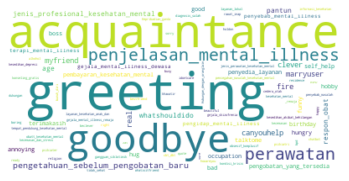

In [ ]:
# display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

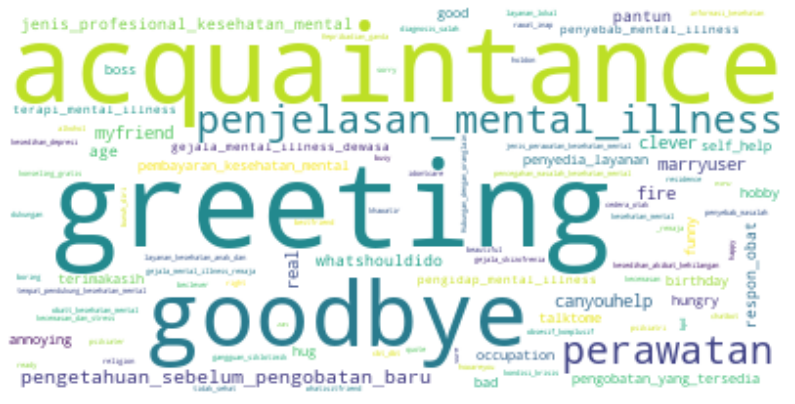

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# download image
!wget -O mask.png https://www.dropbox.com/s/zrzdimcg3o7emhp/pngegg.png?dl=0


--2022-12-14 04:33:27--  https://www.dropbox.com/s/zrzdimcg3o7emhp/pngegg.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zrzdimcg3o7emhp/pngegg.png [following]
--2022-12-14 04:33:27--  https://www.dropbox.com/s/raw/zrzdimcg3o7emhp/pngegg.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0a9305fab732f4fadfbd54f15.dl.dropboxusercontent.com/cd/0/inline/BymKczSKIjL4azvjw22O5f8Roj_8kr7ApTbpx01HE0P5I3fuSKs7fkQ95PUpdfRCdp3FJ8UyVTvDTL8bNgTJPDOdEucJIrtN6f_fxnnAXQ_9KKPtU7nOhBAH2Lr-4pRB02UOgHmAvw-A-G2Wt9BqV08KDusvyqMDhqPXTBgbQUg_QQ/file# [following]
--2022-12-14 04:33:28--  https://ucc0a9305fab732f4fadfbd54f15.dl.dropboxusercontent.com/cd/0/inline/BymKczSKIjL4azvjw22O5f8Roj_8kr7ApTbpx01HE0P5I3fuSKs7fkQ95PUpdfRCdp3FJ8UyVTvDTL8bN

In [ ]:
# save mask to alice_mask
mask = np.array(Image.open('mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


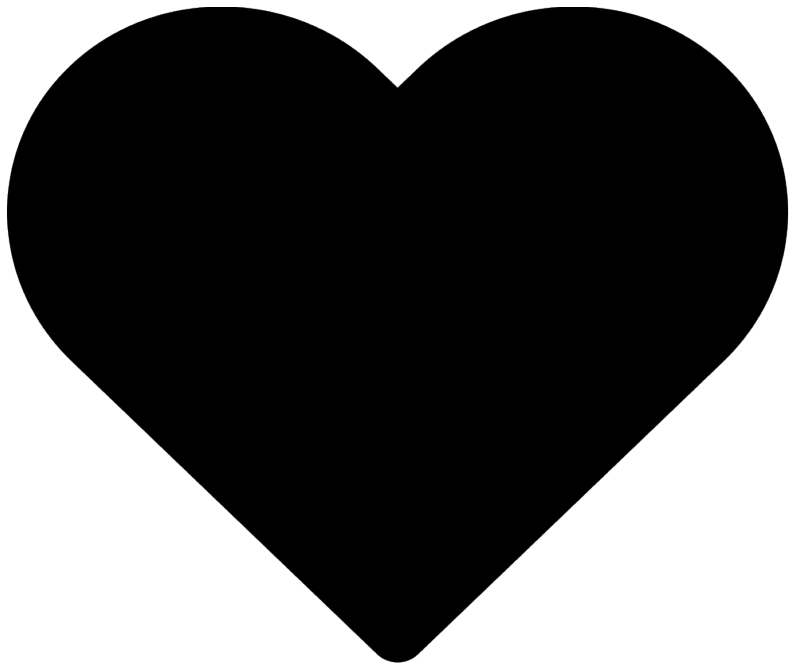

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

**WORDCLOUD DARI DATA TAG**

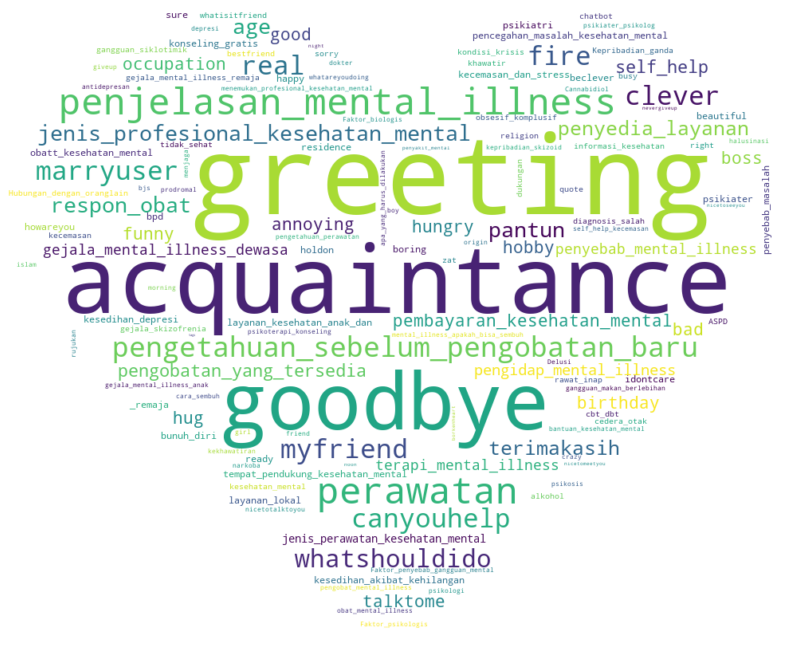

In [ ]:
# instantiate a word cloud object
wc = WordCloud(background_color='white', max_words=2000, mask=mask, collocations=False, stopwords=stopwords)

# generate the word cloud
wc.generate(teks)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save the image
wc.to_file("wordcloud.png")


# **PATTERNS**

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['patterns']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['patterns'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['patterns']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['patterns'])

In [ ]:
df1.to_csv("patterns.txt", sep='\t')

In [ ]:
patterns = open('/content/patterns.txt', 'r').read()

In [ ]:
patterns

'\tpatterns\n0\thallo\n1\thai\n2\thalo\n3\thei\n4\thi\n5\thy\n6\tpagi\n7\tmorning\n8\tsiang\n9\tafternoon\n10\tsore\n11\tmalam\n12\tbro\n13\tsis\n14\tkawan\n15\tDah\n16\tDadah\n17\tBye\n18\tByee\n19\tGood bye\n20\tSelamat tinggal\n21\tSampai jumpa\n22\tBai\n23\tSee you\n24\tThanks\n25\tThank you\n26\tTerima kasih\n27\tMakasih\n28\tTerima kasih banyak\n29\tApa artinya memiliki penyakit mental?\n30\tApa itu penyakit mental?\n31\tApa itu mental illness?\n32\tMental illness adalah?\n33\tPenyakit mental adalah?\n34\tPengertian mental illness\n35\tDefinisi mental illness\n36\tPenjelasan tentang mental illness\n37\tSiapa yang dapat terkena penyakit mental?\n38\tSiapa yang dapat terkena mental illness?\n39\tApakah saya mempunyai penyakit mental?\n40\tApakah saya mempunyai gangguan mental?\n41\tApa penyebab mental illness?\n42\tApa yang menyebabkan seseorang terkena penyakit mental?\n43\tApa penyebab penyakit mental?\n44\tKenapa penyakit mental bisa terjadi?\n45\tFaktor penyebab gangguan mental

In [ ]:
df1.head(30)

0                                     hallo
1                                       hai
2                                      halo
3                                       hei
4                                        hi
5                                        hy
6                                      pagi
7                                   morning
8                                     siang
9                                 afternoon
10                                     sore
11                                    malam
12                                      bro
13                                      sis
14                                    kawan
15                                      Dah
16                                    Dadah
17                                      Bye
18                                     Byee
19                                 Good bye
20                          Selamat tinggal
21                             Sampai jumpa
22                              

In [ ]:
stopwords1 = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    collocations=False, stopwords=stopwords1
)

# generate the word cloud
wc.generate(patterns)

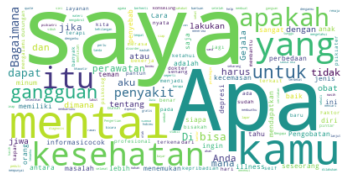

In [ ]:
# display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# download image
!wget -O mask.png https://www.dropbox.com/s/zrzdimcg3o7emhp/pngegg.png?dl=0


In [ ]:
# save mask to alice_mask
mask = np.array(Image.open('mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


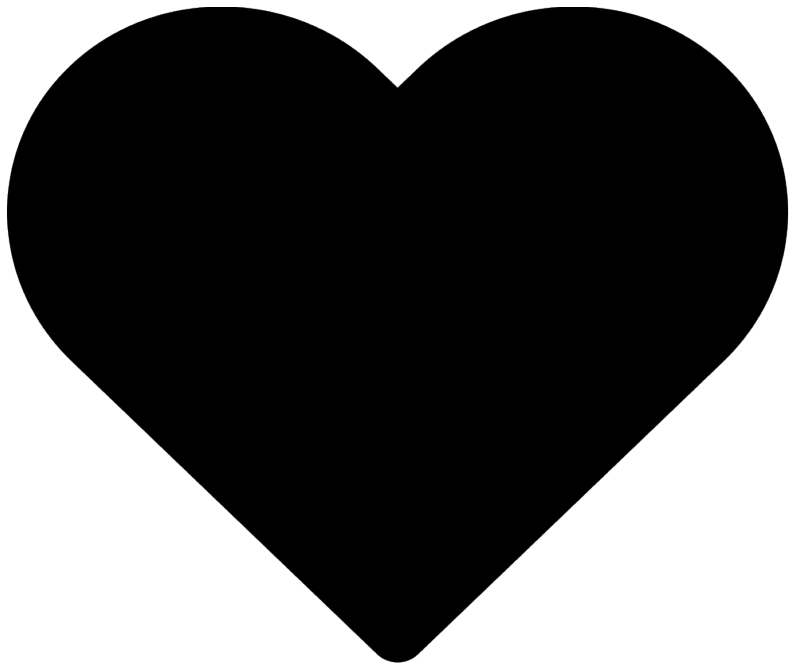

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

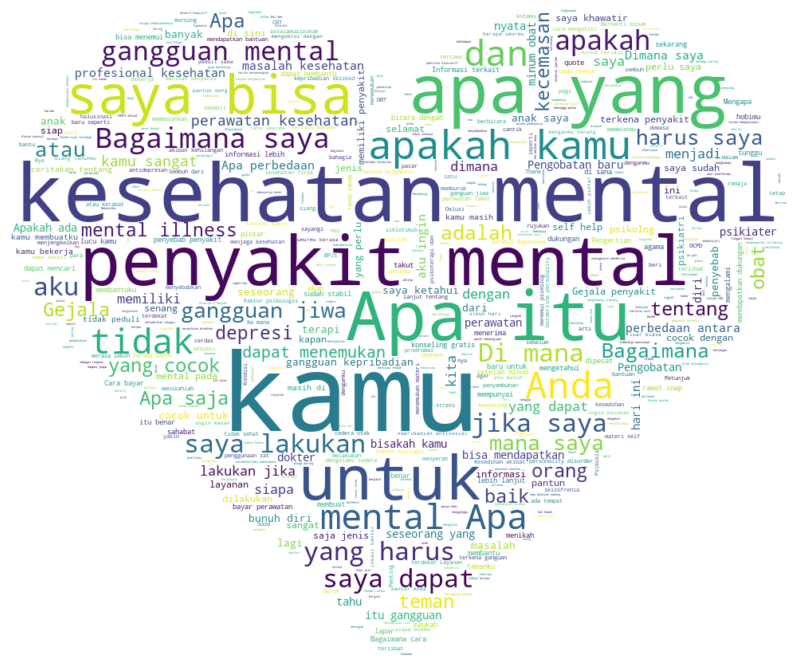

In [ ]:
# instantiate a word cloud object
wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords=stopwords1)

# generate the word cloud
wc.generate(patterns)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save the image
wc.to_file("wordcloud-patterns.png")

## **RESPONSES**

In [ ]:
df2.to_csv("responses.txt", sep='\t')

In [ ]:
responses = open('/content/responses.txt', 'r').read()

In [ ]:
responses

'\tresponses\n0\thallo\n1\thai\n2\thalo\n3\thei\n4\thi\n5\thy\n6\tpagi\n7\tmorning\n8\tsiang\n9\tafternoon\n10\tsore\n11\tmalam\n12\tbro\n13\tsis\n14\tkawan\n15\tDah\n16\tDadah\n17\tBye\n18\tByee\n19\tGood bye\n20\tSelamat tinggal\n21\tSampai jumpa\n22\tBai\n23\tSee you\n24\tThanks\n25\tThank you\n26\tTerima kasih\n27\tMakasih\n28\tTerima kasih banyak\n29\tApa artinya memiliki penyakit mental?\n30\tApa itu penyakit mental?\n31\tApa itu mental illness?\n32\tMental illness adalah?\n33\tPenyakit mental adalah?\n34\tPengertian mental illness\n35\tDefinisi mental illness\n36\tPenjelasan tentang mental illness\n37\tSiapa yang dapat terkena penyakit mental?\n38\tSiapa yang dapat terkena mental illness?\n39\tApakah saya mempunyai penyakit mental?\n40\tApakah saya mempunyai gangguan mental?\n41\tApa penyebab mental illness?\n42\tApa yang menyebabkan seseorang terkena penyakit mental?\n43\tApa penyebab penyakit mental?\n44\tKenapa penyakit mental bisa terjadi?\n45\tFaktor penyebab gangguan menta

In [ ]:
df2.head(10)

0        hallo
1          hai
2         halo
3          hei
4           hi
5           hy
6         pagi
7      morning
8        siang
9    afternoon
Name: responses, dtype: object

In [ ]:
stopwords2 = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords2
)

# generate the word cloud
wc.generate(responses)

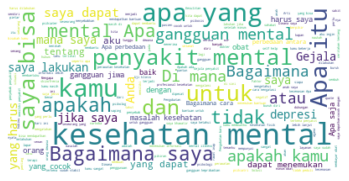

In [ ]:
# display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# save mask to alice_mask
mask = np.array(Image.open('mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


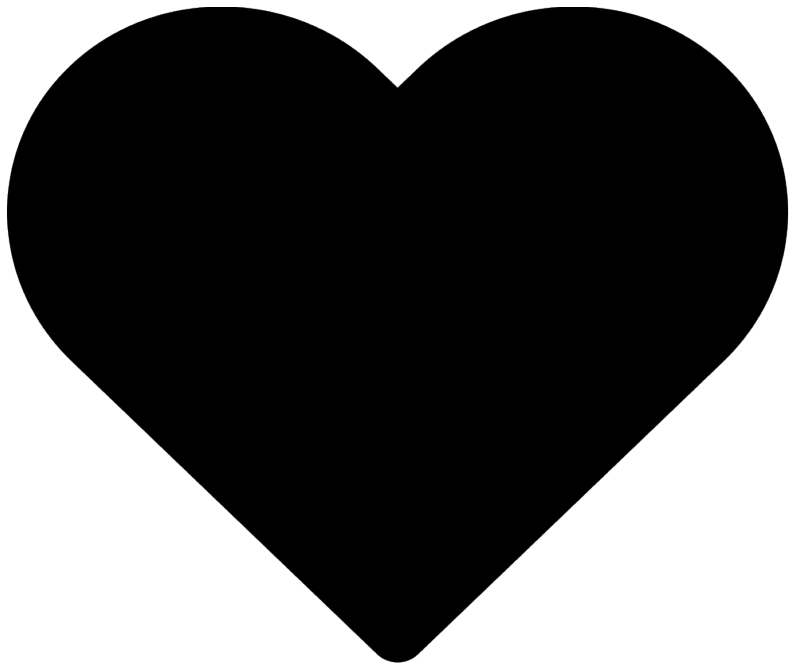

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

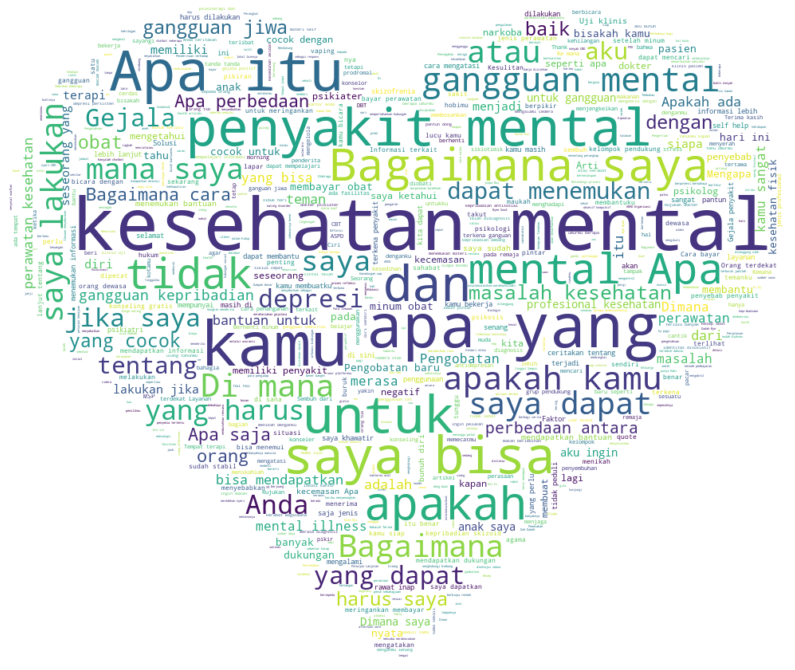

In [ ]:
# instantiate a word cloud object
wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords=stopwords2)

# generate the word cloud
wc.generate(responses)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# save mask to alice_mask
mask = np.array(Image.open('mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!
